In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

BÀI TOÁN DỰ ĐOÁN GIÁ NHÀ ('data_linear.csv')

In [55]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv')
data.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


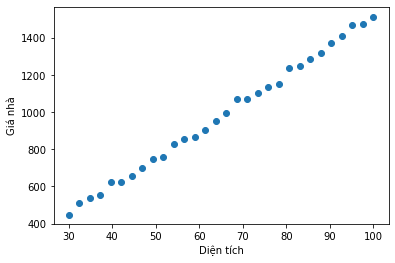

In [56]:
x = np.array([data['Diện tích']]).T
y = np.array([data['Giá']]).T
plt.scatter(x,y)
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
plt.show()

In [57]:
one = np.ones((x.shape[0], 1))
Xbar = np.concatenate((one, x), axis = 1)
A = np.dot(Xbar.T, Xbar)
B = np.dot(Xbar.T, y)
w = np.dot(np.linalg.inv(A), (B))
print('w = ', w)

w =  [[-7.06426865]
 [15.2110908 ]]


In [58]:
w0 = w[0][0]
w1 = w[1][0]
print(w0, w1)

-7.064268645242919 15.211090799670416


Vẽ model dự đoán (đường thẳng) và dữ liệu (point - scatter).

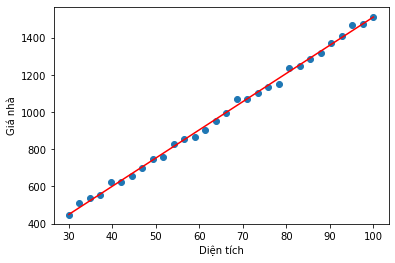

In [59]:
x_line = [30, 100]
y_line = [w0 + w1 * i for i in x_line] #y_line is the linear regression model
plt.plot(x_line , y_line , 'r')
plt.scatter(x, y)
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
plt.show()

Dự đoán giá các căn nhà có diện tích 50, 100, 150.

In [60]:
print("Giá căn nhà có diện tích 50:", w0 + w1 * 50)
print("Giá căn nhà có diện tích 100:", w0 + w1 * 100)
print("Giá căn nhà có diện tích 150:", w0 + w1 * 150)

Giá căn nhà có diện tích 50: 753.4902713382778
Giá căn nhà có diện tích 100: 1514.0448113217985
Giá căn nhà có diện tích 150: 2274.5993513053195


BÀI TOÁN DỰ ĐOÁN GIÁ NHÀ ('housing.csv')

In [61]:
data = pd.read_csv('housing.csv',sep = '\s+', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [62]:
df = pd.DataFrame(data.values, 
                  columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
cor = df.corr(method='pearson')

<AxesSubplot:>

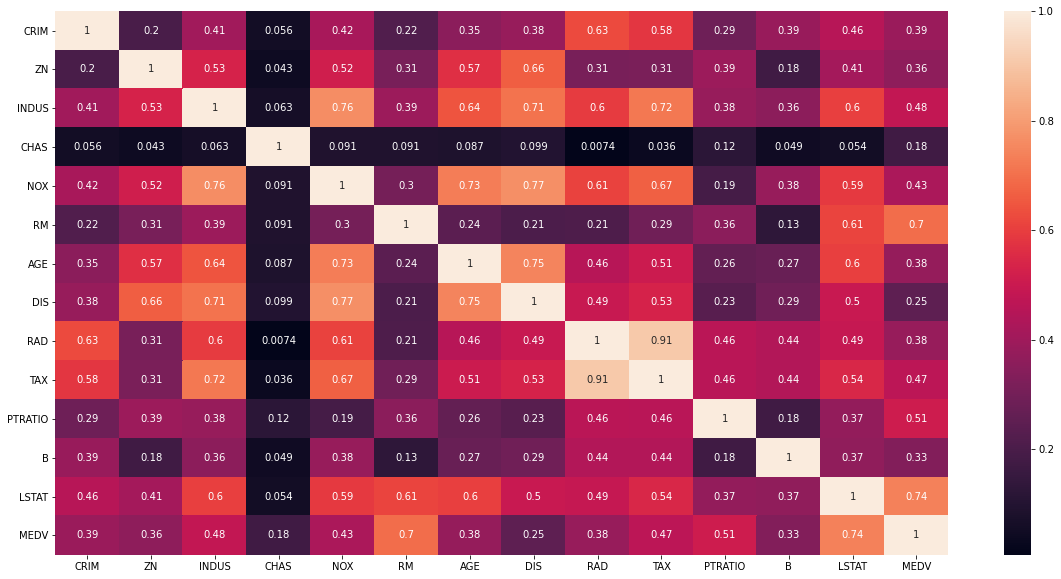

In [65]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [67]:
x = np.array([df['RM'], df['LSTAT']]).T
y = np.array([df['MEDV']]).T
one = np.ones((x.shape[0], 1))
Xbar = np.concatenate((one, x), axis = 1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[-1.35827281]
 [ 5.09478798]
 [-0.64235833]]
